In [1]:
import os
import json
import random

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from PIL import Image

import cv2

from sklearn.experimental import enable_halving_search_cv

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import (train_test_split,cross_val_predict,cross_val_score
                                     ,RandomizedSearchCV,GridSearchCV,HalvingGridSearchCV,HalvingRandomSearchCV)
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.metrics import (f1_score,precision_recall_curve,precision_score
                             ,recall_score,ConfusionMatrixDisplay,accuracy_score)

from plyer import notification
from discord import SyncWebhook


import imgaug.augmenters as imaug

import tensorflow as tf


In [2]:
def alert(data="Execution Completed"):
    notification.notify(
    title = "Python",
    message = data,
    timeout = 10
    )
    

In [3]:
test_dir = "dataset/test/"
train_dir = "dataset/train/"

classes = os.listdir(train_dir)
classes

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [4]:
def augument(data):
    final_img = []
    
    final_img.append(data)
    
    augmentation = imaug.Sequential([
        imaug.Affine(translate_percent={"x": (0.45, -0.45), "y": (-0.2, 0.2)},scale=(0.8,0.8)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])

    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
        imaug.Fliplr(1)
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    #     imaug.Fliplr(1),
    #     imaug.Flipud(1)
        
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8),rotate=(45,45)),
    #     imaug.Fliplr(0),
    #     imaug.Flipud(1)
        
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
    
    augmentation = imaug.Sequential([
        imaug.Affine(scale=(0.8, 0.8)),
        
    ])
    a = augmentation(images = [data])
    final_img.append(a[0])
    
    
    # augmentation = imaug.Sequential([
    #     imaug.Affine(scale=(0.8, 0.8)),
    #     imaug.Flipud(1),
    #     imaug.Fliplr(1),
    # ])
    # a = augmentation(images = [data])
    # final_img.append(a[0])
        
    
    return final_img

In [5]:
x_train = []
y_train = []

encoded_classes = [i for i in range(len(classes))]


count = 0
inc_count = 0

for i in range(len(classes)):
    datalist = os.listdir(train_dir+classes[i])
    
    if (len(datalist) > 500):
        rand = random.sample(range(0,len(datalist)),500)
        
    for j in datalist:
        data = np.asarray(Image.open(train_dir+classes[i]+"/"+j))
        if (i==1):   
            aug_data = augument(data)
            for k in aug_data:
                data_norm = cv2.normalize(k,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                x_train.append(data_norm)
                y_train.append(encoded_classes[i])
                count += 1
                
        elif (i in [0,2]):
            if (inc_count not in rand):
                data_norm = cv2.normalize(data,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                x_train.append(data_norm)
                y_train.append(encoded_classes[i])
                count += 1
                inc_count += 1
                
            else:
                augmentation = imaug.Sequential([
                    imaug.Affine(scale=(0.8, 0.8)),
                    
                ])
                aug_data = augmentation(images = [data])
                
                for k in aug_data:
                    data_norm = cv2.normalize(k,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
                    x_train.append(data_norm)
                    y_train.append(encoded_classes[i])
                    count += 1
                    inc_count += 1      
                
        else:
            data_norm = cv2.normalize(data,None,0,1,cv2.NORM_MINMAX,dtype=cv2.CV_32F)
            x_train.append(data_norm)
            y_train.append(encoded_classes[i])
            count += 1
            
            
    print({classes[i]: count})
    count = 0
    inc_count = 0

x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)


{'angry': 3995}
{'disgusted': 2180}
{'fearful': 4097}
{'happy': 7215}
{'neutral': 4965}
{'sad': 4830}
{'surprised': 3171}
(30453, 48, 48)


In [6]:
def image_show(img):
    data = img
    plt.imshow(cv2.cvtColor(data,cv2.COLOR_BGR2RGB))
    plt.show()

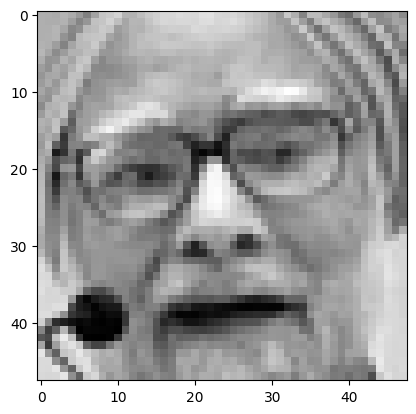

1324


In [7]:
image_show(x_train[1])
print(x_train[0].argmax())

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27407, 48, 48)
(27407,)
(3046, 48, 48)
(3046,)


In [10]:
# webhook = SyncWebhook.from_url("https://discord.com/api/webhooks/1063122746835472466/QWFwQkRFXRtRLa0j21nvMl2D7qQooBs3OiAun2SEwlwSFf0UegILx4SXKxKQ_Gq7FjEr")
# webhook.send(f"Execution Complete => Precision_score - {pres_score}")

# alert(f"Execution Complete => Precision_score - {pres_score}")

In [11]:
# for i in range(len(classes)):
#     datalist = os.listdir(train_dir+classes[i])
#     for j in datalist:
#         count += 1
#     # print({classes[i]: count})
#     # count = 0
    
# print(count)
        

In [12]:
print(classes)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [48,48]),

    tf.keras.layers.Dense(400,activation="elu",kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.3),
    
    tf.keras.layers.Dense(300,activation="elu",kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.3),
    
    tf.keras.layers.Dense(200,activation="elu",kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.3),
    
    tf.keras.layers.Dense(7,activation="softmax")
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 400)               922000    
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               60200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [15]:
# optimizers = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

model.compile(loss="sparse_categorical_crossentropy",optimizer="adam" ,metrics=["accuracy"])

In [16]:
#3.46.9

In [17]:
history = model.fit(x_train,y_train,epochs=30,validation_split=0.05)

Epoch 1/30
814/814 [==============================] - 6s 6ms/step - loss: 2.0593 - accuracy: 0.2284 - val_loss: 1.7392 - val_accuracy: 0.2983
Epoch 2/30
814/814 [==============================] - 5s 6ms/step - loss: 1.7703 - accuracy: 0.2742 - val_loss: 1.6523 - val_accuracy: 0.3406
Epoch 3/30
814/814 [==============================] - 5s 6ms/step - loss: 1.6880 - accuracy: 0.3165 - val_loss: 1.5931 - val_accuracy: 0.3837
Epoch 4/30
814/814 [==============================] - 5s 6ms/step - loss: 1.6530 - accuracy: 0.3362 - val_loss: 1.5731 - val_accuracy: 0.3800
Epoch 5/30
814/814 [==============================] - 5s 6ms/step - loss: 1.6381 - accuracy: 0.3465 - val_loss: 1.6013 - val_accuracy: 0.3669
Epoch 6/30
814/814 [==============================] - 5s 6ms/step - loss: 1.6272 - accuracy: 0.3535 - val_loss: 1.5574 - val_accuracy: 0.3910
Epoch 7/30
814/814 [==============================] - 5s 6ms/step - loss: 1.6228 - accuracy: 0.3581 - val_loss: 1.6195 - val_accuracy: 0.3311
Epoch 

In [18]:
alert()

In [19]:
l = [1,2,3]
print(l[1:2])

[2]


In [20]:
classes

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

1/1 [==============================] - 0s 85ms/step
[[0.14295867 0.01047232 0.13043216 0.28831747 0.12903586 0.26073185
  0.03805162]]
1/1 [==============================] - 0s 24ms/step
happy
sad


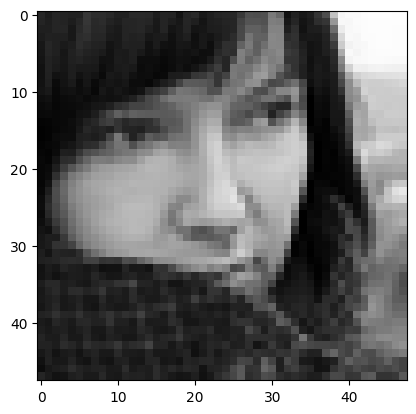

In [21]:
inp = 357

print(model.predict(x_test[inp:inp+1]))
print(classes[model.predict(x_test[inp:inp+1])[0].argmax()])
print(classes[y_test[inp]])
image_show(x_test[inp])


In [22]:
predkt = model.predict(x_test)

96/96 [==============================] - 0s 2ms/step


In [23]:
final_pred = []
for i in predkt:
    final_pred.append(i.argmax())
    
print(final_pred[:10])


[3, 1, 3, 3, 3, 5, 6, 1, 6, 3]


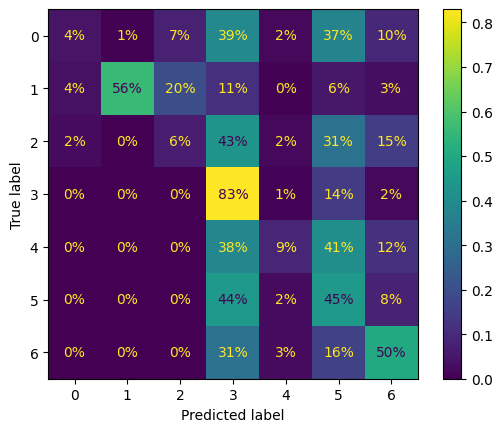

       0          1        2      3        4    5          6
0  angry  disgusted  fearful  happy  neutral  sad  surprised


In [24]:
ConfusionMatrixDisplay.from_predictions(y_test,np.array(final_pred),values_format='.0%',normalize='true')
plt.show()
print(pd.DataFrame([classes]))